In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading Data

In [4]:
#Load our data
Data = pd.read_csv("D:\Data Analysis\chalinge Project\Selected data.csv")

In [5]:
#Data to frame
DataFrame=pd.DataFrame(Data)

In [6]:
# Data sumarization 
DataFrame.describe()

,payment_value,price,freight_value,late_delivary
count,118431.000000,117604.000000,117604.000000,118434.00000
mean,172.849395,120.822849,20.045551,0.07622
std,268.259831,184.477367,15.861351,0.26535
min,0.000000,0.850000,0.000000,0.00000
25%,60.860000,39.900000,13.080000,0.00000
50%,108.200000,74.900000,16.290000,0.00000
75%,189.245000,134.900000,21.190000,0.00000
max,13664.080000,6735.000000,409.680000,1.00000


In [7]:
DataFrame.shape

(118434, 10)

In [9]:
DataFrame.iloc[:11,:]

,order_id,order_purchase_timestamp,order_status,payment_value,payment_type,price,freight_value,estimated_date,delivered_date,late_delivary
0,cf95215a722f3ebf29e6bbab87a29e61,25/08/2017,delivered,102.66,credit_card,89.90,12.76,22/05/2018,09/05/2018,0
1,61059985a6fc0ad64e95d9944caacdad,13/08/2018,delivered,132.04,credit_card,105.00,27.04,04/01/2018,18/12/2017,0
2,8ac09207f415d55acff302df7d6a895c,29/01/2018,delivered,244.15,credit_card,229.99,14.16,04/01/2018,21/12/2017,0
3,b2349a3f20dfbeef62e7b31baa22f84b,08/05/2018,delivered,136.71,credit_card,118.00,18.71,13/06/2018,01/06/2018,0
4,adfbf6c2a620196f9a3ec747491c72b7,29/01/2018,delivered,67.50,credit_card,49.90,17.60,26/06/2017,23/06/2017,0
5,4d680edbaa7d3d9bed69532957368a03,20/08/2018,delivered,353.09,credit_card,167.00,13.22,06/11/2017,19/10/2017,0
6,4d680edbaa7d3d9bed69532957368a03,20/08/2018,delivered,353.09,credit_card,59.99,26.44,28/08/2018,16/08/2018,0
7,4d680edbaa7d3d9bed69532957368a03,20/08/2018,delivered,353.09,credit_card,59.99,26.44,18/09/2017,04/09/2017,0
8,5d9c5817e278892b7498d90bfa28ade8,26/04/2018,canceled,290.16,credit_card,110.90,34.18,18/05/2018,09/05/2018,0
9,5d9c5817e278892b7498d90bfa28ade8,26/04/2018,canceled,290.16,credit_card,110.90,34.18,07/11/2017,07/11/2017,1


# Data Preprocessing

## Handling Duplicates 

In [10]:
# Find and Count all duplicate rows
duplicates = DataFrame[DataFrame.duplicated()]
duplicates.head()


,order_id,order_purchase_timestamp,order_status,payment_value,payment_type,price,freight_value,estimated_date,delivered_date,late_delivary
54,d0a945f85ba1074b60aac97ade7e240e,30/04/2018,delivered,541.00,credit_card,251.92,18.58,28/08/2017,14/08/2017,0
99,8cd68144cdb62dc0d60848cf8616d2a4,04/08/2017,delivered,330.66,boleto,39.00,16.11,21/12/2017,14/12/2017,0
102,8cd68144cdb62dc0d60848cf8616d2a4,04/08/2017,delivered,330.66,boleto,39.00,16.11,26/06/2017,04/12/2017,1
137,8973a53fcad22a79e0ff315e7f9a0fd9,22/10/2017,delivered,176.70,credit_card,71.60,16.75,26/01/2018,10/01/2018,0
279,0cd19e832fefb17664d1a294b90ad192,16/11/2017,delivered,110.20,credit_card,37.50,17.60,08/02/2018,22/01/2018,0


In [11]:
#How many duplicates we have
print(f'The number of duplicated rows is {duplicates.shape[0]}')

The number of duplicated rows is 1335


In [12]:
#Removing the Duplicates
DataFrame.drop_duplicates(inplace=True)
DataFrame.shape

(117099, 10)

In [16]:
# Find and Count all duplicate rows
duplicates = DataFrame[DataFrame["order_id"].duplicated()]
duplicates.head()
duplicates

,order_id,order_purchase_timestamp,order_status,payment_value,payment_type,price,freight_value,estimated_date,delivered_date,late_delivary
6,4d680edbaa7d3d9bed69532957368a03,20/08/2018,delivered,353.09,credit_card,59.99,26.44,28/08/2018,16/08/2018,0
7,4d680edbaa7d3d9bed69532957368a03,20/08/2018,delivered,353.09,credit_card,59.99,26.44,18/09/2017,04/09/2017,0
9,5d9c5817e278892b7498d90bfa28ade8,26/04/2018,canceled,290.16,credit_card,110.90,34.18,07/11/2017,07/11/2017,1
15,c10d412026c4077b8e83acf0fea04eee,12/09/2017,delivered,266.16,credit_card,59.90,28.82,23/03/2018,19/04/2018,1
16,c10d412026c4077b8e83acf0fea04eee,12/09/2017,delivered,266.16,credit_card,59.90,28.82,26/10/2017,NaN,0
...,...,...,...,...,...,...,...,...,...,...
118418,743d702ad0112c210a46dd80145e0102,18/06/2018,delivered,2.37,credit_card,25.60,18.28,25/07/2018,03/07/2018,0
118429,f52a5a508f96400a02ab7d6dd3d73146,04/07/2018,delivered,808.87,boleto,669.65,20.78,26/02/2018,16/02/2018,0
118431,26f35d2f228f74c5c9ca3a74c3a88d7c,11/06/2017,delivered,168.28,credit_card,28.99,13.08,18/06/2018,18/05/2018,0
118432,26f35d2f228f74c5c9ca3a74c3a88d7c,11/06/2017,delivered,168.28,credit_card,28.99,13.08,19/07/2018,04/07/2018,0


In [19]:
# Drop duplicate orders that appear on the same date
DataFrame = DataFrame.drop_duplicates(subset=['order_id'], keep=False)
DataFrame

,order_id,order_purchase_timestamp,order_status,payment_value,payment_type,price,freight_value,estimated_date,delivered_date,late_delivary
0,cf95215a722f3ebf29e6bbab87a29e61,25/08/2017,delivered,102.66,credit_card,89.90,12.76,22/05/2018,09/05/2018,0
1,61059985a6fc0ad64e95d9944caacdad,13/08/2018,delivered,132.04,credit_card,105.00,27.04,04/01/2018,18/12/2017,0
2,8ac09207f415d55acff302df7d6a895c,29/01/2018,delivered,244.15,credit_card,229.99,14.16,04/01/2018,21/12/2017,0
3,b2349a3f20dfbeef62e7b31baa22f84b,08/05/2018,delivered,136.71,credit_card,118.00,18.71,13/06/2018,01/06/2018,0
4,adfbf6c2a620196f9a3ec747491c72b7,29/01/2018,delivered,67.50,credit_card,49.90,17.60,26/06/2017,23/06/2017,0
...,...,...,...,...,...,...,...,...,...,...
118423,19d64e865802a5330304560f7476b29e,11/04/2018,delivered,125.41,boleto,99.90,25.51,05/01/2018,29/12/2017,0
118424,ff365c0a4e998d21ccc46a829e68052b,07/05/2017,delivered,77.57,credit_card,59.90,17.67,19/07/2018,06/07/2018,0
118425,6ffb6234c4ed70abafb657b0111fa8c6,23/06/2017,delivered,72.14,credit_card,56.99,15.15,21/11/2017,13/11/2017,0
118426,7dd12269fb63d70af90a488dc5e90876,07/04/2018,delivered,53.13,credit_card,34.90,18.23,31/01/2018,16/01/2018,0


## Missing Value Handling

In [43]:
#Check for misssing values
print(DataFrame.isnull().sum())

order_id                       0
order_purchase_timestamp       0
order_status                   0
payment_value                  0
payment_type                   0
price                        750
freight_value                750
estimated_date                 0
delivered_date              2494
late_delivary                  0
dtype: int64


In [44]:
DataFrame[DataFrame["price"].isnull()]

,order_id,order_purchase_timestamp,order_status,payment_value,payment_type,price,freight_value,estimated_date,delivered_date,late_delivary
24,947e9c6bfd83a06953c420ef92d3da6e,15/08/2018,canceled,69.46,voucher,NaN,NaN,13/07/2017,03/07/2017,0
468,f86d7bc39aab05299691322044b63bb2,13/08/2018,canceled,1302.42,voucher,NaN,NaN,19/07/2018,27/06/2018,0
474,90eaac01afdf4e531a70ad869e092c75,05/06/2018,canceled,234.43,credit_card,NaN,NaN,15/09/2017,13/09/2017,0
789,27667a063cb59b5d987a5a71c192cce5,27/08/2018,canceled,118.35,voucher,NaN,NaN,22/01/2018,29/12/2017,0
815,b635cbb9f7c2bc5de438f7429b8490e5,31/07/2018,unavailable,1147.97,credit_card,NaN,NaN,23/08/2018,17/08/2018,0
...,...,...,...,...,...,...,...,...,...,...
118155,47282cfe5747c1c19920f090e491d285,23/08/2018,canceled,92.76,voucher,NaN,NaN,29/12/2017,NaN,0
118167,c12a72f72509bcc1317ee119c5ade35b,28/11/2017,unavailable,163.19,credit_card,NaN,NaN,20/12/2017,07/12/2017,0
118299,1ce8144d59eef2763c0fbaf8ffd26d31,10/08/2017,unavailable,65.00,credit_card,NaN,NaN,23/02/2018,15/02/2018,0
118345,46c25d5c696b53935b00b3e3fa555d20,29/06/2017,unavailable,109.91,boleto,NaN,NaN,25/05/2018,17/05/2018,0


In [40]:
# The number of missing values is very small compared to the data
print(int(DataFrame.isnull().sum()[5])/int(DataFrame.shape[0]))

0.008556759840273816


In [45]:
#So we will remove all the null Values to avoide delete the delivered date
dataframe_cleaned = DataFrame.loc[DataFrame["price"].notna()]
dataframe_cleaned.shape

(86900, 10)

In [46]:
print(dataframe_cleaned.isnull().sum()) 

order_id                       0
order_purchase_timestamp       0
order_status                   0
payment_value                  0
payment_type                   0
price                          0
freight_value                  0
estimated_date                 0
delivered_date              2483
late_delivary                  0
dtype: int64


## Zero Values Handling

In [47]:
#How many zeros we have
zero_counts = (dataframe_cleaned == 0).sum()
print( zero_counts) 

order_id                        0
order_purchase_timestamp        0
order_status                    0
payment_value                   0
payment_type                    0
price                           0
freight_value                 305
estimated_date                  0
delivered_date                  0
late_delivary               80330
dtype: int64


### freight_value is almost  equal to ( payment_value  -  price  )

In [51]:
dataframe_cleaned[dataframe_cleaned["freight_value"] == 0]

,order_id,order_purchase_timestamp,order_status,payment_value,payment_type,price,freight_value
555,ad2b9f8531232554f31be87d5ea9da10,09/05/2018,delivered,199.0,credit_card,199.0,0.0
970,beb6927ba358d62ba446c803a6a4d815,24/04/2018,delivered,99.9,credit_card,99.9,0.0
1271,d9d7e5dfa3a521b26058665230c530a2,03/05/2018,delivered,110.0,credit_card,110.0,0.0
1351,00404fa7a687c8c44ca69d42695aae73,07/05/2018,delivered,99.9,boleto,99.9,0.0
1580,72057e22b4e99820f18ad51861441403,04/05/2018,delivered,99.9,credit_card,99.9,0.0
...,...,...,...,...,...,...,...
115611,f7fdd9291fb00404aa63adabadc61ec7,30/04/2018,delivered,99.9,credit_card,99.9,0.0
116639,0a0eb4fdd818ed6fb62d07792c948971,15/05/2018,delivered,116.9,credit_card,116.9,0.0
116815,1235febb7f139ccf94d83ff97ae8e889,10/05/2018,delivered,115.0,credit_card,115.0,0.0
116840,a52ce374ecd1e12480900aa9f5944e4d,08/05/2018,delivered,99.9,credit_card,99.9,0.0


### we do not need to remove the zeros

##  Handling the outliers

In [48]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [49]:
detect_outliers_iqr(dataframe_cleaned,'payment_value')

,order_id,order_purchase_timestamp,order_status,payment_value,payment_type,price,freight_value,estimated_date,delivered_date,late_delivary
26,110d9355d6338eab0a65a0cacdde5434,24/07/2018,delivered,566.40,credit_card,539.90,26.50,04/07/2017,19/06/2017,0
46,1f78449c87a54faf9e96e88ba1491fa9,22/07/2018,delivered,341.09,credit_card,269.00,72.09,29/06/2018,21/06/2018,0
53,d0a945f85ba1074b60aac97ade7e240e,30/04/2018,delivered,541.00,credit_card,251.92,18.58,28/08/2017,14/08/2017,0
57,2e2c60b99754ae1e4d8b18846cfec9f2,22/04/2018,delivered,542.66,credit_card,524.90,17.76,19/10/2017,02/10/2017,0
59,3ab4eea6776259ae8dfbabaeffece352,16/01/2017,delivered,387.80,credit_card,370.00,17.80,23/05/2018,21/05/2018,0
...,...,...,...,...,...,...,...,...,...,...
118389,407ce0da1b714dff0e358c57b4d7bd39,27/09/2017,delivered,368.20,credit_card,349.99,18.21,09/05/2018,24/04/2018,0
118390,446461e627059dcc66c0d83df1d3fadf,07/05/2018,delivered,1115.45,credit_card,1099.99,15.46,23/03/2018,15/03/2018,0
118401,e1b7f8eb9bb3d4ba1c2e244574a71647,29/08/2017,delivered,1123.13,credit_card,1099.99,23.14,16/03/2018,02/03/2018,0
118411,cca79f1e5c4dcf95bfadc53c7a97b4ff,17/04/2018,delivered,1149.83,credit_card,1054.00,95.83,23/03/2018,11/04/2018,1


## payment_value column confirm a right-skewed distribution put we gonna ignore the outliers because it may represent a hight cost orders

In [50]:
# number of outliers in payment_value column
print(f"The number of outlier in payment_value column {int(detect_outliers_iqr(dataframe_cleaned,'payment_value').shape[0])}")

The number of outlier in payment_value column 6562


In [51]:
detect_outliers_iqr(dataframe_cleaned,'price').head()

,order_id,order_purchase_timestamp,order_status,payment_value,payment_type,price,freight_value,estimated_date,delivered_date,late_delivary
26,110d9355d6338eab0a65a0cacdde5434,24/07/2018,delivered,566.40,credit_card,539.9,26.50,04/07/2017,19/06/2017,0
57,2e2c60b99754ae1e4d8b18846cfec9f2,22/04/2018,delivered,542.66,credit_card,524.9,17.76,19/10/2017,02/10/2017,0
59,3ab4eea6776259ae8dfbabaeffece352,16/01/2017,delivered,387.80,credit_card,370.0,17.80,23/05/2018,21/05/2018,0
81,1594012ccc1b0770373ce691d697e5ae,23/04/2018,delivered,362.17,credit_card,330.0,32.17,31/08/2018,25/08/2018,0
85,66f249e4d7ab2f3872de7bd6d74719dd,12/04/2018,delivered,348.77,credit_card,330.0,18.77,27/10/2016,26/10/2016,0


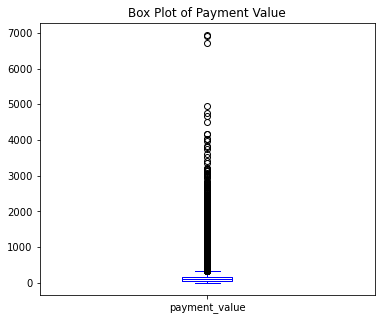

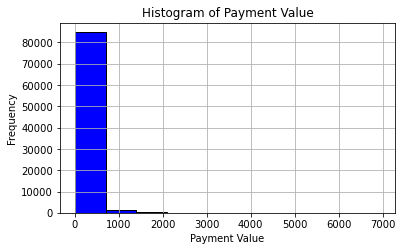

In [52]:
# Create a box plot for payment_value
dataframe_cleaned['payment_value'].plot(kind='box', figsize=(6, 5), color='blue')
plt.title('Box Plot of Payment Value')
plt.show()
#################################################################
# Create a histogram
dataframe_cleaned['payment_value'].hist(bins=10, figsize=(6, 3.5), color='blue', edgecolor='black')

# Labels and Title
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.title('Histogram of Payment Value')

# Show the plot
plt.show()

In [53]:
# number of outliers in price column
print(f"The number of outlier in price column {int(detect_outliers_iqr(dataframe_cleaned,'price').shape[0])}")

The number of outlier in price column 6784


## price column confirm a right-skewed distribution put we gonna ignore the outliers because it may represent a hight cost orders

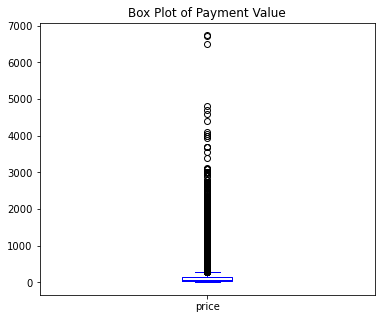

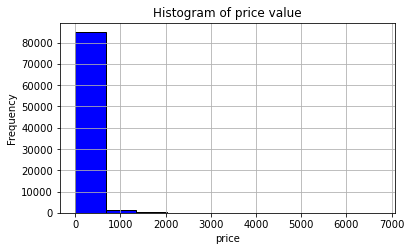

In [54]:
# Create a box plot for payment_value
dataframe_cleaned['price'].plot(kind='box', figsize=(6, 5), color='blue')
plt.title('Box Plot of Payment Value')
plt.show()
#################################################################
# Create a histogram
dataframe_cleaned['price'].hist(bins=10, figsize=(6, 3.5), color='blue', edgecolor='black')

# Labels and Title
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram of price value')

# Show the plot
plt.show()

In [55]:
# number of outliers in freight_value column
print(f"The number of outlier in freght_value column {detect_outliers_iqr(dataframe_cleaned,'freight_value').shape[0]}")

The number of outlier in freght_value column 9595


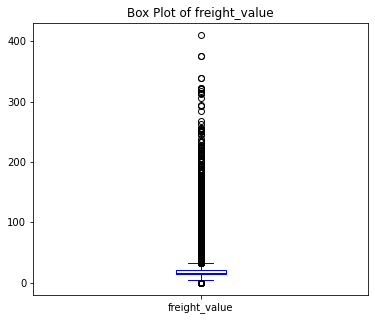

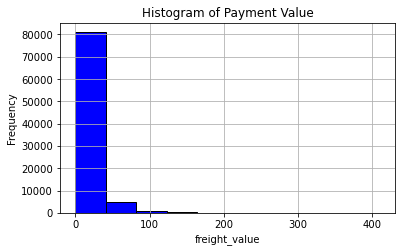

In [56]:
# Create a box plot for payment_value
dataframe_cleaned['freight_value'].plot(kind='box', figsize=(6, 5), color='blue')
plt.title('Box Plot of freight_value')
plt.show()
#################################################################
# Create a histogram
dataframe_cleaned['freight_value'].hist(bins=10, figsize=(6, 3.5), color='blue', edgecolor='black')

# Labels and Title
plt.xlabel('freight_value')
plt.ylabel('Frequency')
plt.title('Histogram of Payment Value')

# Show the plot
plt.show()

# Basic Statistics

In [57]:
total_orders = dataframe_cleaned['order_id'].nunique()
total_revenue = dataframe_cleaned['payment_value'].sum()
average_order_value = dataframe_cleaned['payment_value'].mean()
average_freight = dataframe_cleaned['freight_value'].mean()

print(f"Total Orders: {total_orders}")
print(f"Total Revenue: {total_revenue}")
print(f"Average Order Value: {average_order_value:.2f}")
print(f"Average Freight Cost: {average_freight:.2f}")

Total Orders: 86900
Total Revenue: 13121059.17
Average Order Value: 150.99
Average Freight Cost: 20.33


<ipython-input-58-46090349e2ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_cleaned['order_purchase_timestamp'] = pd.to_datetime(dataframe_cleaned['order_purchase_timestamp'])
<ipython-input-58-46090349e2ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_cleaned['order_month'] = (dataframe_cleaned['order_purchase_timestamp']).dt.to_period('M')


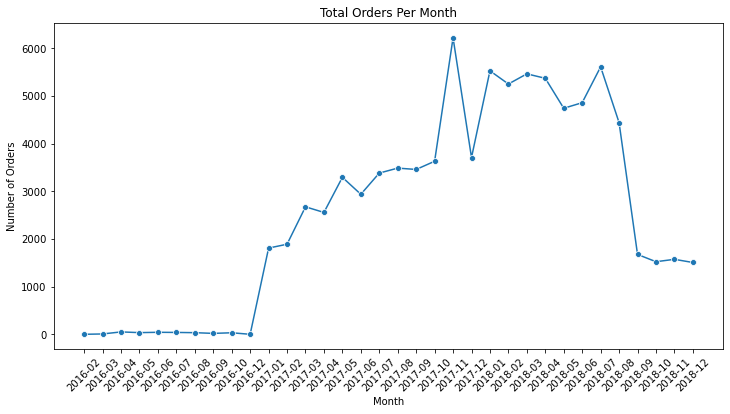

In [58]:
dataframe_cleaned['order_purchase_timestamp'] = pd.to_datetime(dataframe_cleaned['order_purchase_timestamp'])
dataframe_cleaned['order_month'] = (dataframe_cleaned['order_purchase_timestamp']).dt.to_period('M')

order_trend = dataframe_cleaned.groupby('order_month')['order_id'].nunique()
plt.figure(figsize=(12, 6))
sns.lineplot(x=order_trend.index.astype(str), y=order_trend.values, marker='o')
plt.xticks(rotation=45)
plt.title("Total Orders Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


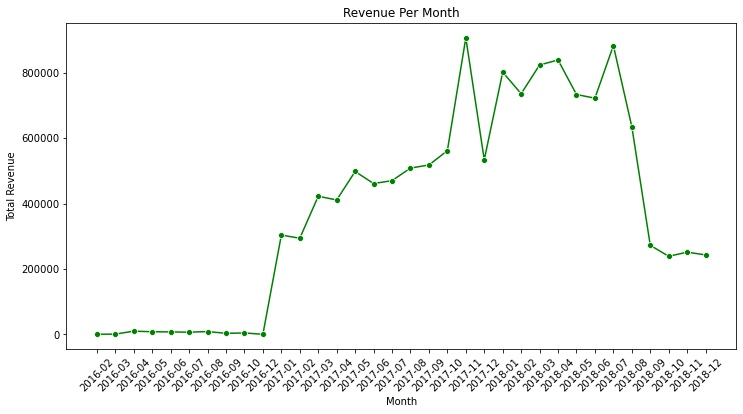

In [59]:
 revenue_trend = dataframe_cleaned.groupby('order_month')['payment_value'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=revenue_trend.index.astype(str), y=revenue_trend.values, marker='o', color='green')
plt.xticks(rotation=45)
plt.title("Revenue Per Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

In [60]:
# Total Revenue (from successfully delivered orders)
total_revenue = dataframe_cleaned[dataframe_cleaned['order_status'] == 'delivered'].eval("price"+"freight_value").sum()
print(f"Total Revenue: ${total_revenue}")


UndefinedVariableError: name 'pricefreight_value' is not defined

In [ ]:
#  Canceled Orders Count
canceled_orders = dataframe_cleaned[dataframe_cleaned['order_status'] == 'canceled'].shape[0]
print(f"Canceled Orders: {canceled_orders}")

In [61]:
expected_revenue = dataframe_cleaned[dataframe_cleaned["order_status"]=='approved'].eval('payment_value').sum()
print(f"Expected Revenue: ${expected_revenue}")

Expected Revenue: $179.46


# load our data for vizualization 

In [62]:
dataframe_cleaned.to_csv("D:\Data Analysis\chalinge Project\cleand data.csv",index=False)